In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import trapz
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import math

In [2]:
def load_data(ny, nz, k, case):

    fname = [f'/home/rees/lsa/eigenvalues/evals_{case}_{ny:02}_{nz:02}_{str(int(k*1e8))}.txt',
             f'/home/rees/lsa/eigenvectors/evecs_{case}_{ny:02}_{nz:02}_{str(int(k*1e8))}.txt']
             
    if not (os.path.exists(fname[0]) and os.path.exists(fname[1])):
        raise ValueError(f'The specified files do not exist\n{fname[0]}\n{fname[1]}')
    else:
        evals = np.loadtxt(fname[0]).view(complex).reshape(-1) 
        evecs = np.loadtxt(fname[1]).view(complex).reshape(-1) 
    
    return evals, evecs

In [113]:
def Proehl_mean_velocity(Y, Z, mean_flow):   
    if mean_flow == 'Proehl_1':
        y_center = 0; z_center = -500; maximum = 1.5; y_decay = 100*1000; z_decay = 100 
        
        U  = maximum*np.exp(-((Y-y_center)**2)/(2*(y_decay**2))-((Z-z_center)**2)/(2*(z_decay**2)))  
        Uy = -(maximum*(Y-y_center)/(y_decay**2))*np.exp(-((Y-y_center)**2)/(2*(y_decay**2))-((Z-z_center)**2)/(2*(z_decay**2)))  
        Uz = -(maximum*(Z-z_center)/(z_decay**2))*np.exp(-((Y-y_center)**2)/(2*(y_decay**2))-((Z-z_center)**2)/(2*(z_decay**2)))  
        
    elif mean_flow == 'Proehl_2':
        y_center = 0; z_center = -500; maximum = -1.5; y_decay = 100*1000; z_decay = 100 
        
        U  = maximum*np.exp(-((Y-y_center)**2)/(2*(y_decay**2))-((Z-z_center)**2)/(2*(z_decay**2)))  
        Uy = -(maximum*(Y-y_center)/(y_decay**2))*np.exp(-((Y-y_center)**2)/(2*(y_decay**2))-((Z-z_center)**2)/(2*(z_decay**2)))  
        Uz = -(maximum*(Z-z_center)/(z_decay**2))*np.exp(-((Y-y_center)**2)/(2*(y_decay**2))-((Z-z_center)**2)/(2*(z_decay**2)))  
        
    elif mean_flow == 'Proehl_3':            
        secs_y_center = -(4*111)*1000; secs_z_center = 0;  secs_maximum = -0.5; secs_decay_y = 100*1000; secs_decay_z = 100
        secn_y_center = (4*111)*1000;  secn_z_center = 0;  secn_maximum = -0.5; secn_decay_y = 100*1000; secn_decay_z = 100

        SECS = secs_maximum*np.exp(-(((Y-secs_y_center)**2)/(2*(secs_decay_y**2)))-(((Z-secs_z_center)**2)/(2*(secs_decay_z**2))))
        SECN = secn_maximum*np.exp(-(((Y-secn_y_center)**2)/(2*(secn_decay_y**2)))-(((Z-secn_z_center)**2)/(2*(secn_decay_z**2))))
        U    = SECS + SECN; Uy = np.gradient(U, Y[0,:], axis=1); Uz = np.gradient(U, Z[:,0], axis=0)
        
    elif mean_flow == 'Proehl_4':
        secs_y_center = -200*1000; secs_z_center = 0;  secs_maximum = -0.5; secs_decay_y = 100*1000; secs_decay_z = 200
        secn_y_center = 200*1000;  secn_z_center = 0;  secn_maximum = -0.5; secn_decay_y = 100*1000; secn_decay_z = 200

        SECS = secs_maximum*np.exp(-(((Y-secs_y_center)**2)/(2*(secs_decay_y**2)))-(((Z-secs_z_center)**2)/(2*(secs_decay_z**2))))
        SECN = secn_maximum*np.exp(-(((Y-secn_y_center)**2)/(2*(secn_decay_y**2)))-(((Z-secn_z_center)**2)/(2*(secn_decay_z**2))))
        U    = SECS + SECN; Uy = np.gradient(U, Y[0,:], axis=1); Uz = np.gradient(U, Z[:,0], axis=0)
        
    elif mean_flow == 'Proehl_5':
        secs_y_center = -200*1000; secs_z_center = 0;     secs_maximum = -0.5; secs_decay_y = 100*1000; secs_decay_z = 200 
        euc_y_center  = 0;          euc_z_center = -120;   euc_maximum = 1.0;   euc_decay_y = 125*1000;  euc_decay_z = 75
        secn_y_center = 200*1000;  secn_z_center = 0;     secn_maximum = -0.5; secn_decay_y = 100*1000; secn_decay_z = 200 

        SECS = secs_maximum*np.exp(-(((Y-secs_y_center)**2)/(2*(secs_decay_y**2)))-(((Z-secs_z_center)**2)/(2*(secs_decay_z**2))))
        EUC  = euc_maximum*np.exp(-(((Y-euc_y_center)**2)/(2*(euc_decay_y**2)))-(((Z-euc_z_center)**2)/(2*(euc_decay_z**2))))
        SECN = secn_maximum*np.exp(-(((Y-secn_y_center)**2)/(2*(secn_decay_y**2)))-(((Z-secn_z_center)**2)/(2*(secn_decay_z**2)))) 
        U    = SECS + EUC + SECN; Uy = np.gradient(U, Y[0,:], axis=1); Uz = np.gradient(U, Z[:,0], axis=0)
        
    elif mean_flow == 'Proehl_6':
        secs_y_center = -200*1000; secs_z_center = 0;     secs_maximum = -0.3; secs_decay_y = 100*1000; secs_decay_z = 200 
        euc_y_center  = 0;          euc_z_center = -120;   euc_maximum = 1.0;   euc_decay_y = 125*1000;  euc_decay_z = 75
        secn_y_center = 200*1000;  secn_z_center = 0;     secn_maximum = -0.7; secn_decay_y = 100*1000; secn_decay_z = 200 
        
        SECS = secs_maximum*np.exp(-(((Y-secs_y_center)**2)/(2*(secs_decay_y**2)))-(((Z-secs_z_center)**2)/(2*(secs_decay_z**2))))
        EUC  = euc_maximum*np.exp(-(((Y-euc_y_center)**2)/(2*(euc_decay_y**2)))-(((Z-euc_z_center)**2)/(2*(euc_decay_z**2))))
        SECN = secn_maximum*np.exp(-(((Y-secn_y_center)**2)/(2*(secn_decay_y**2)))-(((Z-secn_z_center)**2)/(2*(secn_decay_z**2)))) 
        U    = SECS + EUC + SECN; Uy = np.gradient(U, Y[0,:], axis=1); Uz = np.gradient(U, Z[:,0], axis=0)
        
    elif mean_flow == 'Proehl_7':
        secs_y_center = -300*1000; secs_z_center = 0;     secs_maximum = -0.3; secs_decay_y = 200*1000; secs_decay_z = 250 
        euc_y_center  = 0;          euc_z_center = -120;   euc_maximum = 1.0;   euc_decay_y = 125*1000; euc_decay_z  = 75
        secn_y_center = 200*1000;  secn_z_center = 0;     secn_maximum = -0.7; secn_decay_y = 100*1000; secn_decay_z = 150 

        SECS = secs_maximum*np.exp(-(((Y-secs_y_center)**2)/(2*(secs_decay_y**2)))-(((Z-secs_z_center)**2)/(2*(secs_decay_z**2))))
        EUC  = euc_maximum*np.exp(-(((Y-euc_y_center)**2)/(2*(euc_decay_y**2)))-(((Z-euc_z_center)**2)/(2*(euc_decay_z**2))))
        SECN = secn_maximum*np.exp(-(((Y-secn_y_center)**2)/(2*(secn_decay_y**2)))-(((Z-secn_z_center)**2)/(2*(secn_decay_z**2)))) 
        U    = SECS + EUC + SECN; Uy = np.gradient(U, Y[0,:], axis=1); Uz = np.gradient(U, Z[:,0], axis=0)
        
    elif mean_flow == 'Proehl_8':
        secs_y_center = -300*1000; secs_z_center = 0;     secs_maximum = -0.3; secs_decay_y = 200*1000; secs_decay_z = 250 
        euc_y_center  = 0;          euc_z_center = -120;   euc_maximum = 1.0;   euc_decay_y = 125*1000; euc_decay_z  = 75
        secn_y_center = 200*1000;  secn_z_center = 0;     secn_maximum = -0.7; secn_decay_y = 100*1000; secn_decay_z = 150 
        necc_y_center = 600*1000;  necc_z_center = 0;     necc_maximum = 0.5;  necc_decay_y = 150*1000; necc_decay_z = 250

        SECS = secs_maximum*np.exp(-(((Y-secs_y_center)**2)/(2*(secs_decay_y**2)))-(((Z-secs_z_center)**2)/(2*(secs_decay_z**2))))
        SECN = secn_maximum*np.exp(-(((Y-secn_y_center)**2)/(2*(secn_decay_y**2)))-(((Z-secn_z_center)**2)/(2*(secn_decay_z**2))))
        EUC  = euc_maximum*np.exp(-(((Y-euc_y_center)**2)/(2*(euc_decay_y**2)))-(((Z-euc_z_center)**2)/(2*(euc_decay_z**2))))
        NECC = necc_maximum*np.exp(-(((Y-necc_y_center)**2)/(2*(necc_decay_y**2)))-(((Z-euc_z_center)**2)/(2*(necc_decay_z**2))))
        U    = SECS + EUC + SECN + NECC; Uy = np.gradient(U, Y[0,:], axis=1); Uz = np.gradient(U, Z[:,0], axis=0)
        
    else:
        raise ValueError(f'{mean_flow} is not a valid option for a mean flow')
    
    return U, Uy, Uz

def on_each_grid(ny, nz, case):

    if case == 'NEMO':
        lat   = np.loadtxt(f'/home/rees/lsa/NEMO_mean_fields/latitude_12.txt')
        depth = np.loadtxt(f'/home/rees/lsa/NEMO_mean_fields/depth.txt'); depth = -depth[::-1]
        
        L = abs(lat[0])*111.12*1000
        D = 1000
        
    else:
        L = (10*111.12)*1000 # Meridional half-width of the domain (m)
        D = 1000             # Depth of the domain (m)

    y = np.linspace(-L, L, ny); z = np.linspace(-D, 0, nz) 

    dy = abs(y[1]-y[0]); y_mid = (y[:y.size] + 0.5*dy)[:-1]
    dz = abs(z[1]-z[0]); z_mid = (z[:z.size] + 0.5*dz)[:-1]

    Y,Z         = np.meshgrid(y, z);         Y_full,Z_half = np.meshgrid(y, z_mid) 
    Y_mid,Z_mid = np.meshgrid(y_mid, z_mid); Y_half,Z_full = np.meshgrid(y_mid, z)

    if case == 'NEMO':
        U, Uy, Uz, U_mid, U_hf, U_fh, Uy_mid, Uz_mid, Uz_hf = calculate_NEMO_fields.mean_velocity(ny, nz)
    else:
        U    , Uy    , Uz     = Proehl_mean_velocity(Y     , Z     , case)
        U_mid, Uy_mid, Uz_mid = Proehl_mean_velocity(Y_mid , Z_mid , case)
        U_hf , Uy_hf , Uz_hf  = Proehl_mean_velocity(Y_half, Z_full, case)
        U_fh , Uy_fh , Uz_fh  = Proehl_mean_velocity(Y_full, Z_half, case)

    # Typical values for the equatorial ocean 
    beta   = 2.29e-11          # Meridional gradient of the Coriolis parameter (m^{-1}s^{-1})
    N2     = 8.883e-5;         # Buoyancy frequency (s^{-2}) (as in Proehl 96/98)
    r0     = 1026              # Background density (kg m^{3})
    g      = 9.81              # Gravitational acceleration (ms^{-2})

    # Calculate the mean density profile (by thermal wind balance)

    #if case == 'NEMO':
    #    r, ry, rz, r_mid, ry_mid, rz_mid = calculate_NEMO_fields.NEMO_mean_density(ny, nz)
    
    r = np.zeros((nz, ny), dtype=np.float64)
    for l in range(nz):
        for j in range(ny):
            r[l, j] = (beta*r0/g)*trapz((Y*Uz)[l, :j],dx=dy)

    r = (r0/g)*(beta*integrate.cumtrapz(Y*Uz, y, initial=0) + np.tile(integrate.cumtrapz(N2*np.ones(Z.shape[0]), z, initial=0)[::-1], (len(y), 1)).T)

    ry = (beta*r0/g)*Y*Uz; rz = np.gradient(r, z, axis=0)
    
    r_hf = (r0/g)*(beta*integrate.cumtrapz(Y_half*Uz_hf, y_mid, initial=0) + np.tile(integrate.cumtrapz(N2*np.ones(Z.shape[0]), z, initial=0)[::-1], (len(y)-1, 1)).T)
    ry_hf = (beta*r0/g)*Y_half*Uz_hf; rz_hf = np.gradient(r_hf, z, axis=0)

    r_mid = np.zeros((nz-1, ny-1), dtype=np.float64)
    for l in range(nz-1):
        for j in range(ny-1):
            r_mid[l, j] = (beta*r0/g)*trapz((Y_mid*Uz_mid)[l, :j],dx=dy)

    r_mid = (r0/g)*(beta*integrate.cumtrapz(Y_mid*Uz_mid, y_mid, initial=0) + np.tile(integrate.cumtrapz(N2*np.ones(Z_mid.shape[0]), z_mid, initial=0)[::-1], (len(y)-1, 1)).T)
    ry_mid = (beta*r0/g)*Y_mid*Uz_mid; rz_mid = np.gradient(r_mid, z_mid, axis=0)
    
    return U, U_mid, U_hf, U_fh, Uy, Uy_mid, Uy_hf, Uz, Uz_mid, Uz_hf, r, r_mid, r_hf, ry,ry_mid, ry_hf, rz, rz_mid, rz_hf 

def on_each_grid2(ny, nz, k, case):
    
    # Calculate the domain used for contour plotting---------------------------------------------------
    
    if case == 'NEMO':
        lat   = np.loadtxt(f'/home/rees/lsa/NEMO_mean_fields/latitude_12.txt')
        depth = np.loadtxt(f'/home/rees/lsa/NEMO_mean_fields/depth.txt'); depth = -depth[::-1]
        
        L = abs(lat[0])*111.12*1000
        D = 1000
        
    else:
        L = (10*111.32)*1000 # Meridional half-width of the domain (m)
        D = 1000             # Depth of the domain (m)

    y = np.linspace(-L, L, ny); z = np.linspace(-D, 0, nz) 

    dy = abs(y[1]-y[0]); y_mid = (y[:y.size] + 0.5*dy)[:-1]
    dz = abs(z[1]-z[0]); z_mid = (z[:z.size] + 0.5*dz)[:-1]

    Y,Z         = np.meshgrid(y, z);         Y_full,Z_half = np.meshgrid(y, z_mid) 
    Y_mid,Z_mid = np.meshgrid(y_mid, z_mid); Y_half,Z_full = np.meshgrid(y_mid, z)
    
    g, r0 = 9.81, 1026
    
    # Specify the filenames of the eigenvector that we aim to plot ----------------------------------
    
    fname = [f'/home/rees/lsa/eigenvalues/evals_{case}_{ny:02}_{nz:02}_{str(int(k*1e8))}.txt',
            f'/home/rees/lsa/eigenvectors/evecs_{case}_{ny:02}_{nz:02}_{str(int(k*1e8))}.txt']
    
    # If the eigenvector has not been previously calculated then we do so now
    if os.path.exists(fname[0]) and os.path.exists(fname[1]):
        print(f'Loading eigenvalues and eigenvectors...')
        evals, evecs = load_data(ny, nz, k, case)
        cs = evals[np.argmax(evals.imag)].imag
    else:
        raise ValueError(f'The specified files do not exist\n{fname[0]}\n{fname[1]}')  
       
    U, U_mid, U_hf, U_fh, Uy, Uy_mid, Uy_hf, Uz, Uz_mid, Uz_hf, r, r_mid, r_hf, ry,ry_mid, ry_hf, rz, rz_mid, rz_hf = on_each_grid(ny, nz, case)
       
    u = np.reshape(evecs[:(ny-1)*(nz-1)], (ny-1, nz-1)).T
    v = np.reshape(evecs[(ny-1)*(nz-1):(2*ny-1)*(nz-1)], (ny, nz-1)).T
    p = np.reshape(evecs[(2*ny-1)*(nz-1):], (ny-1, nz-1)).T
    
    dpdz = np.gradient(p, z_mid, axis=0)
    
    #dpdz_w = np.zeros((nz, ny-1), dtype=complex)
    #for j in range(ny-1):
    #    for l in range(1,nz-1):
    #        dpdz_w[l, j] = 0.5*(dpdz[l, j] + dpdz[l-1, j])
            
    dpdz_w = np.zeros((nz, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(1,nz-1):
            dpdz_w[l, j] = (1/dz)*(p[l,j]-p[l-1,j])
            
    rho = -(1/g)*dpdz_w
    
    #w = np.zeros((nz, ny-1), dtype=complex)
    #for j in range(ny-1):
    #    for l in range(1,nz-1):
    #        w[l, j] = (1j*k/g)*(1/rz_hf[l, j])*(U_hf[l, j]-cs)*dpdz_w[l,j]-0.25*(v[l-1, j]+v[l-1, j+1]+v[l, j]+v[l, j+1])*(ry_hf/rz_hf)[l, j]
    
    #w = np.zeros((nz, ny-1), dtype=complex)
    #for j in range(ny-1):
    #    for l in range(nz-2):
    #        w[l+1, j] = ((1j*k)/(g*dz))*(1/rz_hf[l+1, j])*(U_hf[l+1, j]-cs)*(p[l+1, l]-p[l, j])-0.25*(v[l, j]+v[l, j+1]+v[l+1, j]+v[l+1, j+1])*(ry_hf/rz_hf)[l+1, j]
            
    #rho = np.zeros((nz, ny-1), dtype=complex)
    #for j in range(ny-1):
    #    for l in range(nz-2):
    #        rho[l, j] = (1j/(k*(U_hf[l,j]-cs)))*(0.25*(v[l, j]+v[l,j+1]+v[l+1, j]+v[l+1, j+1])*ry_hf[l,j]+w[l,j]*rz_hf[l,j])       
            
    u_v = np.zeros((nz-1, ny), dtype=complex)
    for j in range(1,ny-1):
        for l in range(nz-1):
            u_v[l, j] = 0.5*(u[l, j] + u[l, j-1])

    u_w = np.zeros((nz, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(1,nz-1):
            u_w[l, j] = 0.5*(u[l, j] + u[l-1, j])

    v_p = np.zeros((nz-1, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(nz-1):
            v_p[l, j] = 0.5*(v[l, j+1] + v[l, j])

    v_w = np.zeros((nz, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(1,nz-1):
            v_w[l, j] = 0.25*(v[l-1, j]+v[l-1,j+1]+v[l, j]+v[l, j+1])

    p_v = np.zeros((nz-1, ny), dtype=complex)
    for j in range(1,ny-1):
        for l in range(nz-1):
            p_v[l, j] = 0.5*(p[l, j] + p[l, j-1])

    p_w = np.zeros((nz, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(1,nz-1):
            p_w[l, j] = 0.5*(p[l, j] + p[l-1, j])
            
    w = np.zeros((nz, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(1,nz-1):
            w[l, j] = ((1j*k/g)*(1/rz_hf[l, j])*(U_hf[l, j]-cs)*dpdz_w[l,j]-v_w[l,j]*(ry_hf/rz_hf)[l, j])
            
    w_v = np.zeros((nz-1, ny), dtype=complex)
    for j in range(1,ny-1):
        for l in range(nz-1):
            w_v[l, j] = 0.25*(w[l, j-1]+w[l,j]+w[l+1, j-1]+w[l+1, j])

    w_p = np.zeros((nz-1, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(nz-1):
            w_p[l, j] = 0.5*(w[l+1, j]+w[l, j])

    rho_v = np.zeros((nz-1, ny), dtype=complex)
    for j in range(1,ny-1):
        for l in range(nz-1):
            rho_v[l, j] = 0.25*(rho[l, j-1]+rho[l,j]+rho[l+1, j-1]+rho[l+1, j])

    rho_p = np.zeros((nz-1, ny-1), dtype=complex)
    for j in range(ny-1):
        for l in range(nz-1):
            rho_p[l, j] = 0.5*(rho[l+1, j]+rho[l, j])
            
    return u, u_v, u_w, v, v_p, v_w, p, p_v, p_w, w, w_v, w_p, rho, rho_v, rho_p, dpdz, dpdz_w

In [114]:
# ny, nz, k, case = 100, 50, 6.76e-6, 'Proehl_1'
# ny, nz, k, case = 100, 50, 4.07e-6, 'Proehl_2'
ny, nz, k, case = 110, 50, 9.77e-6, 'Proehl_3'
# ny, nz, k, case = 60, 50, 8.85e-6, 'Proehl_4'
# ny, nz, k, case = 60, 50, 8.71e-6, 'Proehl_5'
# ny, nz, k, case = 60, 50, 7.84e-6, 'Proehl_6'
# ny, nz, k, case = 60, 50, 7.86e-6, 'Proehl_7'
# ny, nz, k, case = 60, 50, 6.99e-6, 'Proehl_8'

#ny, nz, k, case = 100, 50, 5.50e-6, 'Proehl_3'

In [115]:
L = (10*111.12)*1000 # Meridional half-width of the domain (m)
D = 1000             # Depth of the domain (m)

y = np.linspace(-L, L, ny); z = np.linspace(-D, 0, nz) 

dy = abs(y[1]-y[0]); y_mid = (y[:y.size] + 0.5*dy)[:-1]
dz = abs(z[1]-z[0]); z_mid = (z[:z.size] + 0.5*dz)[:-1]

Y,Z         = np.meshgrid(y, z);         Y_full,Z_half = np.meshgrid(y, z_mid) 
Y_mid,Z_mid = np.meshgrid(y_mid, z_mid); Y_half,Z_full = np.meshgrid(y_mid, z)

U, U_mid, U_hf, U_fh, Uy, Uy_mid, Uy_hf, Uz, Uz_mid, Uz_hf, r, r_mid, r_hf, ry,ry_mid, ry_hf, rz, rz_mid, rz_hf = on_each_grid(ny, nz, case)
u, u_v, u_w, v, v_p, v_w, p, p_v, p_w, w, w_v, w_p, rho, rho_v, rho_p, dpdz, dpdz_w = on_each_grid2(ny, nz, k, case)

def za(data1, data2):
    return 0.25*(np.conj(data1)*data2+data1*np.conj(data2))

MEPFD = za(v_p, p).real
VEPFD = za(w_p, p).real
KHC = -za(u,w_p).real*Uz_mid

Loading eigenvalues and eigenvectors...


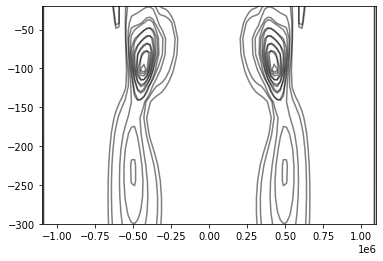

In [106]:
#plt.contour(Y_mid, Z_mid, dpdz, colors='b')
plt.contour(Y_half, Z_full, dpdz_w, colors='k', alpha=.5)
plt.contour(Y_half, Z_full, dpdz2, colors='k', alpha=.5)
plt.ylim([-300,-20])
plt.show()

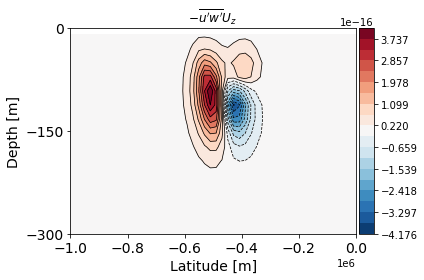

In [116]:
fig, axes=plt.subplots(figsize=(6,4))

CS = axes.contourf(Y_mid, Z_mid, KHC, levels = np.linspace(-np.amax(abs(KHC)), np.amax(abs(KHC)), 20), cmap='RdBu_r')
axes.contour(Y_mid, Z_mid, KHC, levels = np.linspace(-np.amax(abs(KHC)), np.amax(abs(KHC)), 20), colors='k', linewidths=0.75)

#axes.contour(Y, Z, Qy, levels = 0, colors='k', linewidths=2)
#axes.contour(Y, Z, EIL, levels = 0, colors='k', linestyles='--', linewidths=2)
#critical_level = axes.contourf(Y, Z, critical, 1, hatches=['', '......'], colors='none')

divider = make_axes_locatable(axes)
cax = divider.append_axes("right", size="5%", pad = 0.05)

cbar = plt.colorbar(CS, cax=cax)
cbar.formatter.set_powerlimits((0,0))
cbar.update_ticks()

if case == 'Proehl_1' or case == 'Proehl_2':
    axes.set_xlim([-3e5, 0])
    axes.set_ylim([-800, -200])

    axes.set_xticks([-3e5, -2e5, -1e5, 0])
    axes.set_yticks([-800, -500, -200])
    
elif case == 'Proehl_3':
    axes.set_xlim([-1e6, 0])
    axes.set_ylim([-300, 0])

    axes.set_xticks([-1e6, -8e5, -6e5, -4e5, -2e5, 0])
    axes.set_yticks([-300, -150, 0])
    
else:
    axes.set_xlim([-8e5, 8e5])
    axes.set_ylim([-250, 0])

    axes.set_xticks([-8e5, -6e5, -4e5, -2e5, 0, 2e5, 4e5, 6e5, 8e5])
    axes.set_yticks([-250, -200, -150, -100, -50, 0])
    
axes.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axes.tick_params(axis='both', which='major', labelsize=14)

axes.set_xlabel(f'Latitude [m]', fontsize=14)
axes.set_ylabel(f'Depth [m]', fontsize=14)
axes.set_title(r'$-\overline{u^{\prime} w^{\prime}}U_{z}$')

plt.tight_layout()
plt.show()

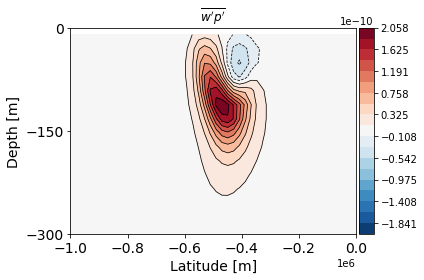

In [117]:
fig, axes=plt.subplots(figsize=(6,4))

CS = axes.contourf(Y_mid, Z_mid, VEPFD, levels = np.linspace(-np.amax(abs(VEPFD)), np.amax(abs(VEPFD)), 20), cmap='RdBu_r')
axes.contour(Y_mid, Z_mid, VEPFD, levels = np.linspace(-np.amax(abs(VEPFD)), np.amax(abs(VEPFD)), 20), colors='k', linewidths=0.75)

divider = make_axes_locatable(axes)
cax = divider.append_axes("right", size="5%", pad = 0.05)

cbar = plt.colorbar(CS, cax=cax)
cbar.formatter.set_powerlimits((0,0))
cbar.update_ticks()

if case == 'Proehl_1' or case == 'Proehl_2':    
    axes.set_xlim([-3e5, 0])
    axes.set_ylim([-800, -200])

    axes.set_xticks([-3e5, -2e5, -1e5, 0])
    axes.set_yticks([-800, -500, -200])
    
elif case == 'Proehl_3':
    axes.set_xlim([-1e6, 0])
    axes.set_ylim([-300, 0])

    axes.set_xticks([-1e6, -8e5, -6e5, -4e5, -2e5, 0])
    axes.set_yticks([-300, -150, 0])
    
else:
    axes.set_xlim([-8e5, 8e5])
    axes.set_ylim([-250, 0])

    axes.set_xticks([-8e5, -6e5, -4e5, -2e5, 0, 2e5, 4e5, 6e5, 8e5])
    axes.set_yticks([-250, -200, -150, -100, -50, 0])

axes.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axes.tick_params(axis='both', which='major', labelsize=14)

axes.set_xlabel(f'Latitude [m]', fontsize=14)
axes.set_ylabel(f'Depth [m]', fontsize=14)
axes.set_title(r'$\overline{w^{\prime} p^{\prime}}$')

plt.tight_layout()
plt.show()